In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('50_Startups.csv')

In [20]:
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [21]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
# Divide the data into dependent & independent
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
x,y

(array([[165349.30000000002, 136897.9, 471784.2, 'New York'],
        [162597.80000000002, 151377.69, 443898.63, 'California'],
        [153441.61000000002, 101145.65, 407934.64, 'Florida'],
        [144372.51, 118671.95, 383199.72, 'New York'],
        [142107.44, 91391.87, 366168.52, 'Florida'],
        [131877.0, 99814.81, 362861.46, 'New York'],
        [134615.56, 147198.97, 127716.92, 'California'],
        [130298.23, 145530.16, 323876.78, 'Florida'],
        [120542.62, 148719.05000000002, 311613.39, 'New York'],
        [123334.98, 108679.27, 304981.72, 'California'],
        [101913.18, 110594.21, 229161.05, 'Florida'],
        [100672.06, 91790.71, 249744.65, 'California'],
        [93863.85, 127320.48, 249839.54, 'Florida'],
        [91992.49, 135495.17, 252665.03, 'California'],
        [119943.34, 156547.52000000002, 256513.02, 'Florida'],
        [114523.71, 122616.94, 261776.33, 'New York'],
        [78013.21, 121597.65, 264346.16, 'California'],
        [94657.26, 1450

In [25]:
# Feature Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [26]:
x = np.array(column_transformer.fit_transform(x))

In [27]:
x

array([[0.0, 0.0, 1.0, 165349.30000000002, 136897.9, 471784.2],
       [1.0, 0.0, 0.0, 162597.80000000002, 151377.69, 443898.63],
       [0.0, 1.0, 0.0, 153441.61000000002, 101145.65, 407934.64],
       [0.0, 0.0, 1.0, 144372.51, 118671.95, 383199.72],
       [0.0, 1.0, 0.0, 142107.44, 91391.87, 366168.52],
       [0.0, 0.0, 1.0, 131877.0, 99814.81, 362861.46],
       [1.0, 0.0, 0.0, 134615.56, 147198.97, 127716.92],
       [0.0, 1.0, 0.0, 130298.23, 145530.16, 323876.78],
       [0.0, 0.0, 1.0, 120542.62, 148719.05000000002, 311613.39],
       [1.0, 0.0, 0.0, 123334.98, 108679.27, 304981.72],
       [0.0, 1.0, 0.0, 101913.18, 110594.21, 229161.05],
       [1.0, 0.0, 0.0, 100672.06, 91790.71, 249744.65],
       [0.0, 1.0, 0.0, 93863.85, 127320.48, 249839.54],
       [1.0, 0.0, 0.0, 91992.49, 135495.17, 252665.03],
       [0.0, 1.0, 0.0, 119943.34, 156547.52000000002, 256513.02],
       [0.0, 0.0, 1.0, 114523.71, 122616.94, 261776.33],
       [1.0, 0.0, 0.0, 78013.21, 121597.65, 264346.

In [28]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
len(x_train)

40

In [31]:
len(x_test)

10

In [32]:
x_test

array([[1.0, 0.0, 0.0, 28754.43, 118546.15, 172795.77000000002],
       [0.0, 0.0, 1.0, 94657.26, 145077.68, 282574.41],
       [1.0, 0.0, 0.0, 91992.49, 135495.17, 252665.03],
       [1.0, 0.0, 0.0, 64664.81, 139553.26, 137962.72],
       [0.0, 1.0, 0.0, 55494.05, 103057.59, 214634.91],
       [0.0, 0.0, 1.0, 131877.0, 99814.81, 362861.46],
       [0.0, 1.0, 0.0, 1315.56, 115816.31, 297114.56],
       [1.0, 0.0, 0.0, 162597.80000000002, 151377.69, 443898.63],
       [1.0, 0.0, 0.0, 46426.17, 157694.02000000002, 210797.77],
       [0.0, 0.0, 1.0, 114523.71, 122616.94, 261776.33]], dtype=object)

In [33]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [34]:
x_test

array([[ 1.52752523, -0.73379939, -0.73379939, -0.96851399, -0.03108679,
        -0.20048311],
       [-0.65465367, -0.73379939,  1.36277029,  0.49575807,  0.87672752,
         0.67780563],
       [ 1.52752523, -0.73379939, -0.73379939,  0.43655047,  0.54884821,
         0.43851435],
       [ 1.52752523, -0.73379939, -0.73379939, -0.17063375,  0.68770157,
        -0.47916643],
       [-0.65465367,  1.36277029, -0.73379939, -0.37439568, -0.56105006,
         0.13425273],
       [-0.65465367, -0.73379939,  1.36277029,  1.32273052, -0.67200643,
         1.32014564],
       [-0.65465367,  1.36277029, -0.73379939, -1.5781687 , -0.12449218,
         0.79413473],
       [ 1.52752523, -0.73379939, -0.73379939,  2.0053053 ,  1.09229139,
         1.96848701],
       [ 1.52752523, -0.73379939, -0.73379939, -0.57587175,  1.30841367,
         0.10355353],
       [-0.65465367, -0.73379939,  1.36277029,  0.93716381,  0.10820112,
         0.5114097 ]])

In [35]:
# Create Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
# Prediction
y_prediction = regressor.predict(x_test)

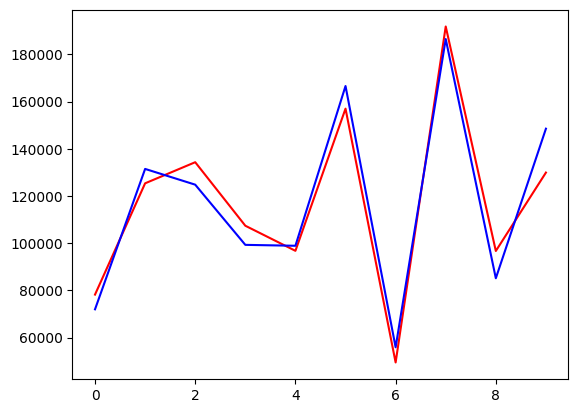

In [37]:
# Plotting of y_test and y_predictionabs
plt.plot(y_test, color='red', label='test')
plt.plot(y_prediction, color='blue', label='prediction')

In [38]:
# Out of the box prediction
data = [[0.0, 1.0, 0.0, 70000, 100000, 300000]]
new_df = pd.DataFrame(data)

In [39]:
new_df = standard_scaler.transform(new_df)

In [40]:
new_df

array([[-0.65465367,  1.36277029, -0.73379939, -0.05209302, -0.66566989,
         0.81721982]])

In [41]:
single = regressor.predict(new_df)

In [43]:
print(single)

[113121.85113661]
